In [821]:
import pandas as pd
df = pd.read_excel('0_SERIES_RCWallDB_v.July2013.xlsx',
                  sheet_name='SERIES_DB-MetaData',
                   
                  index = False)
# df.head()

In [822]:
headers = df.iloc[3]
df1  = pd.DataFrame(df.values[4:], columns=headers)
df1.reset_index(drop=True, inplace=True)
# df.rename(columns={ df.columns[1]: "your value" }, inplace = True)
df1.drop(['#', '# Exp. campaign','# Test'], axis=1, inplace=True)
# new_df = new_df.drop("3", axis = 1)
df1 = df1.fillna(0)

df1['Units (SI/US)'] = pd.factorize(df1['Units (SI/US)'])[0] + 1
df1['Loading (C/M)'] = pd.factorize(df1['Loading (C/M)'])[0] + 1
df1['Cross Section'] = pd.factorize(df1['Cross Section'])[0] + 1
df1['P-D'] = pd.factorize(df1['P-D'])[0] + 1
df1['Test Configu-ration'] = pd.factorize(df1['Test Configu-ration'])[0] + 1
df1['Embedment Type'] = pd.factorize(df1['Embedment Type'])[0] + 1
df1['Type of Confin.'] = pd.factorize(df1['Type of Confin.'])[0] + 1

df1.drop(['Test ID notation', 'Reference', 'Ribbed/Smooth Bars', 'Steel Grade','Steel   Grade'], axis=1, inplace=True)

# df1.head()

In [823]:
X = df1.dtypes
# X[0:40]

In [824]:
import numpy as np
df2 = df1
# df2['Failure'] = df1['Failure'].replace(3,2)
fial = np.array([1, 2])
df3 = df2.loc[df2['Failure'].isin(fial)]

In [825]:
df4 = df3.select_dtypes(include=['float64'])
df5 = df3.select_dtypes(include=['int64'])
df6 = df4.astype(np.int64)

df6 = pd.concat([df5, df6], axis=1)

df_norm = (df6 - df6.min()) / (df6.max() - df6.min())
df_norm = df_norm.fillna(0)
df6.to_csv('matlab.csv')

In [886]:

y = df6.loc[:, df6.columns == 'Failure'].to_numpy()
X = df6.loc[:, df6.columns != 'Failure'].to_numpy()
# X = df_norm.loc[:, df_norm.columns != 'Failure'].to_numpy()
y = y-1
# ax = y.plot.hist(bins=2, alpha=0.5)

In [887]:
"""Example of adaptive Lasso to produce event sparser solutions
Adaptive lasso consists in computing many Lasso with feature
reweighting. It's also known as iterated L1.
"""
# Authors: Alexandre Gramfort <firstname.lastname@inria.fr>
# License: BSD (3-clause)

"Example of adaptive Lasso to produce event sparser solutions\nAdaptive lasso consists in computing many Lasso with feature\nreweighting. It's also known as iterated L1.\n"

In [1251]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

# X, y, coef = make_regression(n_samples=4, n_features=3, n_informative=1,
#                     noise=0.001, shuffle=True, coef=True, random_state=49)

alpha = 0.2

g = lambda w: np.sqrt(np.abs(w))
gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

# Or another option:
# ll = 0.01
# g = lambda w: np.log(ll + np.abs(w))
# gprime = lambda w: 1. / (ll + np.abs(w))

#####
logit = lambda w: 1/(1+np.exp(-w))
classify = lambda w: np.sign(w)/2 + 0.5
#####

n_samples, n_features = X.shape
# p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y - classify(np.dot(X, w))) ** 2) \
#                   + alpha * np.sum(g(w))
y_hat = lambda w: logit(np.dot(X, w))

p_obj = lambda w: -1. / ( n_samples) * np.sum(
                                                (     y * np.log(  y_hat(w))
                                                 + (1-y)* np.log(1-y_hat(w)) ) ) \
                  + alpha * np.sum(g(w))

weights = np.ones(n_features)
n_lasso_iterations = 10

for k in range(n_lasso_iterations):
    X_w = X / weights[np.newaxis, :]
    clf = Lasso(alpha=alpha, fit_intercept=True)
    clf.fit(X_w, y)
    coef_ = clf.coef_ / weights
    weights = gprime(coef_)
    print (p_obj(coef_))  # should go down

print (np.mean((clf.coef_ != 0.0) == (coef != 0.0)))


160.04233070745164
158.87663123830563
158.93633647991143
159.10185781369827
159.0548936184565
159.03386472859322
159.0255250120638
159.02224424065818
159.02095208840396
159.02044236589242
0.0


<ipython-input-1251-a02f34fed2f2>:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print (np.mean((clf.coef_ != 0.0) == (coef != 0.0)))


In [1252]:
X

array([[  1,   1,   1, ..., 490,   0,   0],
       [  1,   1,   1, ..., 490,   0,   0],
       [  1,   1,   2, ..., 362,   0,   0],
       ...,
       [  1,   1,   1, ..., 342, 445,   0],
       [  1,   1,   1, ..., 342, 445,   0],
       [  1,   1,   2, ..., 342, 445,   0]], dtype=int64)

In [1253]:
y

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [1254]:
coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.29609575e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.47676360e-04,  0.00000000e+00,  6.81145563e-07,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  6.81809481e-04, -0.00000000e+00,
       -0.00000000e+00,  3.79290325e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [1255]:
for i in range(coef_.shape[0]):
    if coef_[i] != 0:
        print(df6.columns[i])

fc [MPa/ksi]
bw [mm/inches]
Ls [mm/inches]
Reinf. Ratio, % (Calc.)
fyl Interm. Parallel to Load [MPa/ksi]
fyv longitudinal [MPa/ksi]
Bar diameter [mm/inches]


In [1256]:
y_pred = classify(np.dot(X, coef_))
# np.dot(X, coef_)
# classify(0)

In [1257]:
Y_pred = np.asarray(y_pred)
Y_pred = Y_pred.reshape([225, 1]) 
Y = np.asarray(y)
Y = Y.reshape([225, 1]) 
output = np.concatenate((Y, Y_pred), axis=1)
output

array([[0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

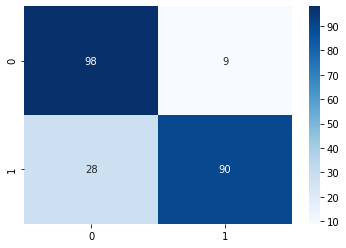

In [1258]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y, y_pred)
# sns.heatmap(cm/np.sum(cm), annot=True, 
#             fmt='.2%', cmap='Blues')
sns.heatmap(cm, annot=True, cmap='Blues')

In [1259]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8355555555555556